<a href="https://colab.research.google.com/github/Rohith616/Client-Project-1/blob/main/AutoViML_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autoviml

     |████████████████████████████████| 125 kB 11.9 MB/s 
     |████████████████████████████████| 76.1 MB 62 kB/s 
     |████████████████████████████████| 173.6 MB 4.3 kB/s 
     |████████████████████████████████| 564 kB 21.8 MB/s 
     |████████████████████████████████| 174 kB 11.6 MB/s 
     |████████████████████████████████| 125 kB 37.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=cb41b6927c94a4aa0c0d104004d622b55b36d5dd9c896caee4e8e741c9ad248c
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import pandas as pd
data = pd.read_csv('/content/preprocessed_data.csv')

In [ ]:
data['event'].fillna("no event", inplace = True)
data['holiday'].fillna("休日なし", inplace = True)

In [ ]:
data['ds']=pd.to_datetime(data['ds'] )

In [ ]:
df = data.select_dtypes(include=["object"])

In [ ]:
df =data.select_dtypes(include='object')
  
#df=df.drop(['target_address'],axis=1)
for cols in df:
  dummies =pd.get_dummies(df[cols],drop_first=True)
  df = pd.concat([df,dummies],axis='columns')
data=pd.concat([data,df],axis='columns')
#data=data.drop(df.columns,axis=1)


In [ ]:
df = data.select_dtypes(include=["object"])
df.head()

,target_address,event,cat_r,holiday,weather,target_address,event,cat_r,holiday,weather
0,東京都/東京,no event,cat_r_1,元日,cloud,東京都/東京,no event,cat_r_1,元日,cloud
1,東京都/東京,no event,cat_r_0,休日なし,sunny,東京都/東京,no event,cat_r_0,休日なし,sunny
2,東京都/東京,no event,cat_r_1,休日なし,sunny,東京都/東京,no event,cat_r_1,休日なし,sunny
3,東京都/東京,no event,cat_r_0,休日なし,cloud,東京都/東京,no event,cat_r_0,休日なし,cloud
4,東京都/東京,no event,cat_r_1,休日なし,sunny,東京都/東京,no event,cat_r_1,休日なし,sunny


In [ ]:
data

,Unnamed: 0,ds,target_id,target_address,y,event,cat_r,reg_wind,reg_r,holiday,weather,temp_max,temp_min,target_address,event,cat_r,holiday,weather,東京都/東京,event2,event3,no event,cat_r_1,みどりの日,休日なし,体育の日,元日,勤労感謝の日,国民の休日,天皇の即位の日,天皇誕生日,山の日,建国記念の日,憲法記念日,成人の日,振替休日,敬老の日,文化の日,春分の日,昭和の日,海の日,秋分の日,rain,snow,sunny
0,0,2015-01-01,0,東京都/東京,89.058108,no event,cat_r_1,4.4,17.856631,元日,cloud,8.2,0.7,東京都/東京,no event,cat_r_1,元日,cloud,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2015-01-02,0,東京都/東京,88.638431,no event,cat_r_0,2.1,-2.435871,休日なし,sunny,7.9,-2.2,東京都/東京,no event,cat_r_0,休日なし,sunny,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2015-01-03,0,東京都/東京,80.884749,no event,cat_r_1,3.0,15.382444,休日なし,sunny,8.9,-1.1,東京都/東京,no event,cat_r_1,休日なし,sunny,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,2015-01-04,0,東京都/東京,89.288376,no event,cat_r_0,1.3,11.864588,休日なし,cloud,9.3,-0.4,東京都/東京,no event,cat_r_0,休日なし,cloud,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2015-01-05,0,東京都/東京,86.867064,no event,cat_r_1,2.4,-14.973754,休日なし,sunny,12.9,1.3,東京都/東京,no event,cat_r_1,休日なし,sunny,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,1748,2019-10-15,1,大阪府/大阪,156.960567,no event,cat_r_1,2.8,2.630001,休日なし,sunny,23.1,14.6,大阪府/大阪,no event,cat_r_1,休日なし,sunny,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3502,1749,2019-10-16,1,大阪府/大阪,130.886110,event2,cat_r_1,2.2,23.602167,休日なし,sunny,22.4,12.8,大阪府/大阪,event2,cat_r_1,休日なし,sunny,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3503,1750,2019-10-17,1,大阪府/大阪,137.061111,event2,cat_r_1,1.8,18.308426,休日なし,cloud,23.7,14.3,大阪府/大阪,event2,cat_r_1,休日なし,cloud,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3504,1751,2019-10-18,1,大阪府/大阪,139.740341,no event,cat_r_1,2.5,2.687561,休日なし,cloud,24.0,18.4,大阪府/大阪,no event,cat_r_1,休日なし,cloud,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = data.select_dtypes(include=["object"])

In [ ]:
data=data.drop(df.columns,axis=1)

In [ ]:
data

,Unnamed: 0,ds,target_id,y,reg_wind,reg_r,temp_max,temp_min,東京都/東京,event2,event3,no event,cat_r_1,みどりの日,休日なし,体育の日,元日,勤労感謝の日,国民の休日,天皇の即位の日,天皇誕生日,山の日,建国記念の日,憲法記念日,成人の日,振替休日,敬老の日,文化の日,春分の日,昭和の日,海の日,秋分の日,rain,snow,sunny
0,0,2015-01-01,0,89.058108,4.4,17.856631,8.2,0.7,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2015-01-02,0,88.638431,2.1,-2.435871,7.9,-2.2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2015-01-03,0,80.884749,3.0,15.382444,8.9,-1.1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,2015-01-04,0,89.288376,1.3,11.864588,9.3,-0.4,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2015-01-05,0,86.867064,2.4,-14.973754,12.9,1.3,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,1748,2019-10-15,1,156.960567,2.8,2.630001,23.1,14.6,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3502,1749,2019-10-16,1,130.886110,2.2,23.602167,22.4,12.8,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3503,1750,2019-10-17,1,137.061111,1.8,18.308426,23.7,14.3,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3504,1751,2019-10-18,1,139.740341,2.5,2.687561,24.0,18.4,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(3506, 35)

In [ ]:
total_rows,total_cols= data.shape
rows= round(total_rows/5)
rows = total_rows - rows
rows

2805

In [ ]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data,test_size=0.25)

In [ ]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.684. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2629, 35)
    Training Set Memory Usage = 0.25 MB
Test Set Shape = (877, 35)
    Test Set Memory Usage = 0.08 MB
Single_Label Target: ['y']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  28
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Del

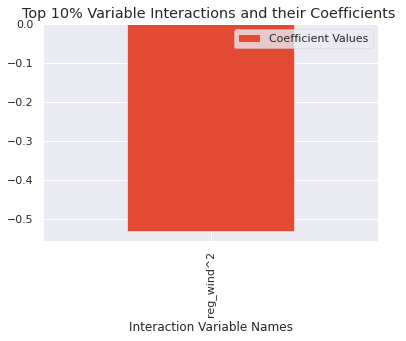

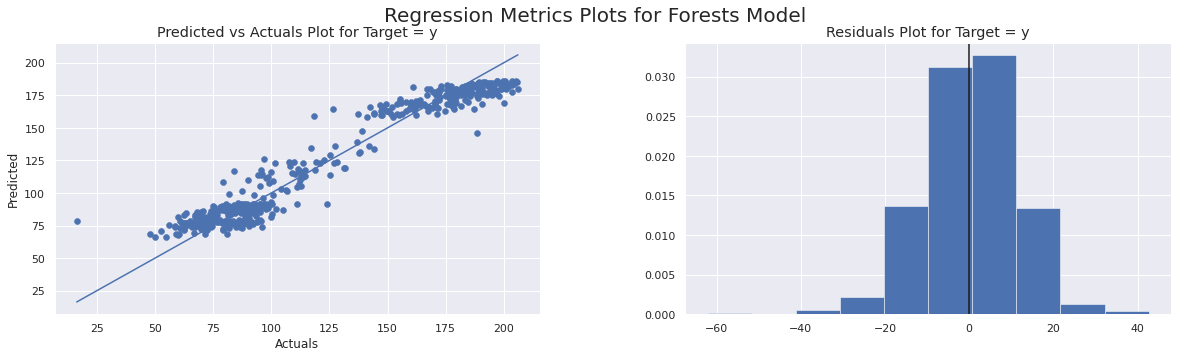

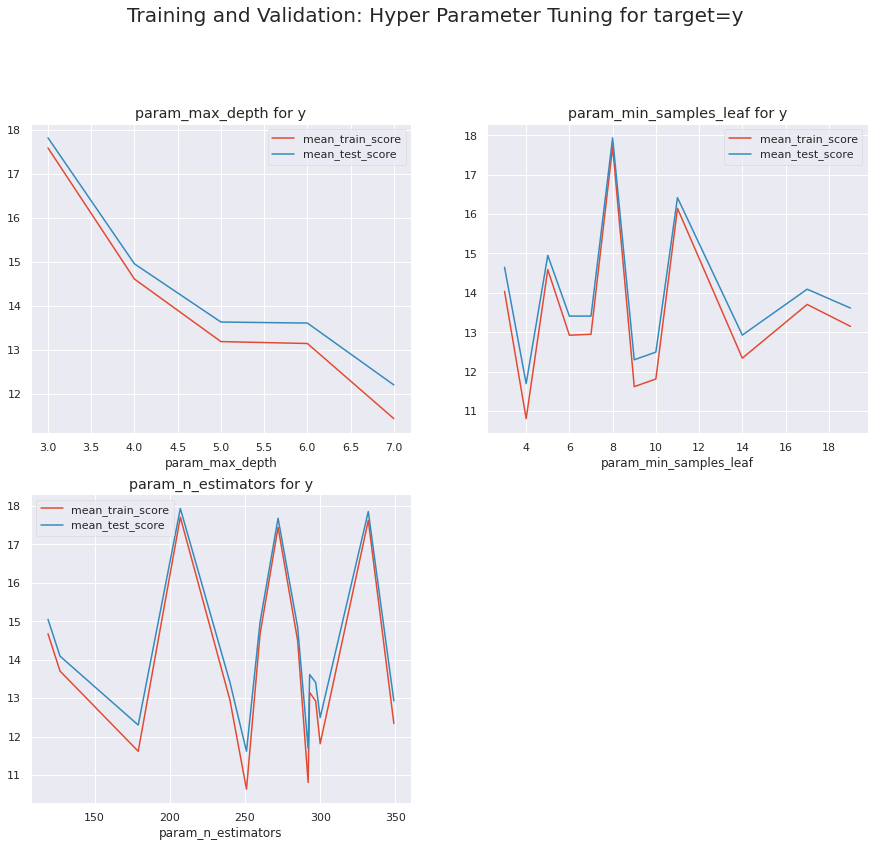

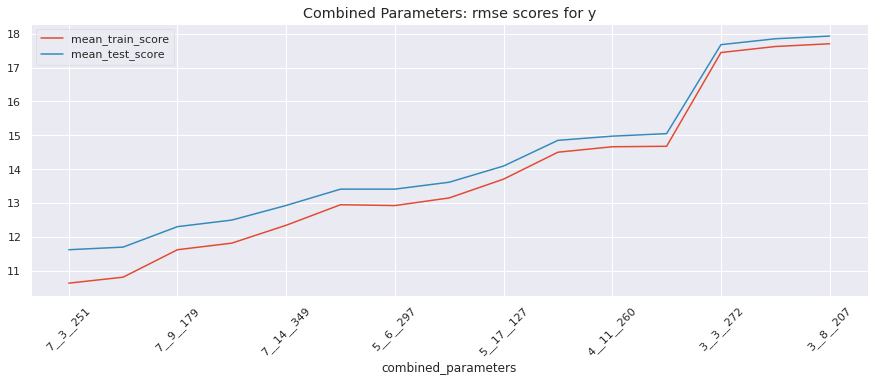

    Time taken for this Target (in seconds) = 178
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Time taken for Stacking: 0.3 seconds
    Adding 1 Stacking feature(s) to training data
    Time taken for Stacking: 0.1 seconds
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Time taken for Stacking: 0.3 seconds
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 179
Writing Output files to disk...
    Saving predictions to ./y/y_Regression_test_modified.csv
    Saving predictions to ./y/y_Regression_submission.csv
    Saving predic

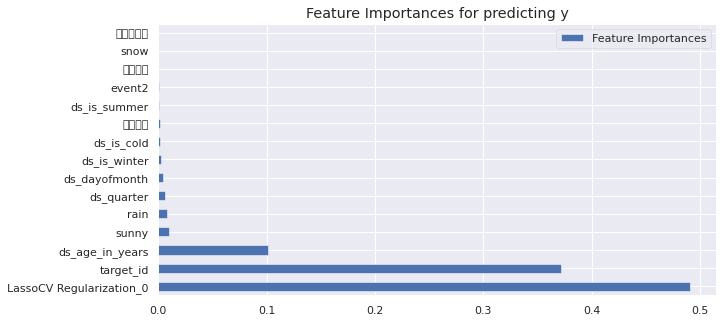

In [ ]:
target = 'y'
m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag=False, Binning_Flag=False,
                            Add_Poly=2, Stacking_Flag=True,Imbalanced_Flag=False,
                            verbose=1 )

In [ ]:
m

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=3,
                      n_estimators=251, n_jobs=-1, random_state=99,
                      warm_start=True)

In [ ]:
testm

,target_id,ds_age_in_years,snow,sunny,ds_is_winter,event2,ds_quarter,休日なし,rain,ds_is_cold,憲法記念日,文化の日,ds_dayofmonth,昭和の日,ds_is_summer,LassoCV Regularization_0,y_Stacked_LassoCV Regularization_predictions,y_predictions
1771,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.60,0.00,0.00,0.77,161.69,112.18
913,0.00,0.50,0.00,0.00,0.00,0.00,0.67,1.00,0.00,0.00,0.00,0.00,0.03,0.00,1.00,0.16,75.48,75.49
1507,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.50,0.00,0.00,0.31,96.63,89.14
1812,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.62,139.69,97.19
58,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.90,0.00,0.00,0.19,79.73,86.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,1.00,0.00,0.00,0.00,0.00,0.00,0.67,1.00,0.00,0.00,0.00,0.00,0.17,0.00,1.00,0.84,170.82,160.44
1700,0.00,0.00,0.00,0.00,0.00,0.00,0.67,1.00,1.00,0.00,0.00,0.00,0.90,0.00,1.00,0.19,78.58,72.05
369,0.00,0.75,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.13,0.00,0.00,0.22,84.24,89.65
2672,1.00,0.50,0.00,0.00,0.00,0.00,0.67,1.00,0.00,0.00,0.00,0.00,0.23,0.00,1.00,0.75,158.55,177.15


In [ ]:
trainm

,target_id,ds_age_in_years,snow,sunny,ds_is_winter,event2,ds_quarter,休日なし,rain,ds_is_cold,憲法記念日,文化の日,ds_dayofmonth,昭和の日,ds_is_summer,y,LassoCV Regularization_0
3300,1,3,0,0,0,0,1,1,0,1,0,0,28,0,0,157.76,178.61
352,0,7,0,1,1,0,4,1,0,1,0,0,19,0,0,80.55,76.34
2092,1,7,0,0,1,0,4,1,0,1,0,0,6,0,0,133.97,152.30
226,0,7,0,1,0,0,3,1,0,0,0,0,15,0,1,82.20,71.90
1139,0,4,0,1,1,0,1,1,0,1,0,0,13,0,0,97.87,96.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,1,3,0,0,0,0,1,1,0,1,0,0,3,0,0,158.29,176.18
2109,1,7,0,0,1,0,4,0,0,1,0,0,23,0,0,136.71,161.46
3100,1,4,0,0,0,0,3,1,0,0,0,0,9,0,0,162.83,166.29
1834,1,7,0,1,0,0,1,1,0,1,0,0,23,0,0,109.28,161.15


In [ ]:
feats

['target_id',
 'ds_age_in_years',
 'snow',
 'sunny',
 'ds_is_winter',
 'event2',
 'ds_quarter',
 '休日なし',
 'rain',
 'ds_is_cold',
 '憲法記念日',
 '文化の日',
 'ds_dayofmonth',
 '昭和の日',
 'ds_is_summer',
 'LassoCV Regularization_0']

In [ ]:
y = pd.read_csv('/content/y/y_Regression_test_modified.csv')

In [ ]:
y

,target_id,ds_age_in_years,snow,sunny,ds_is_winter,event2,ds_quarter,休日なし,rain,ds_is_cold,憲法記念日,文化の日,ds_dayofmonth,昭和の日,ds_is_summer,LassoCV Regularization_0,y_Stacked_LassoCV Regularization_predictions,y_predictions
0,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.60,0.00,0.00,0.77,161.69,112.18
1,0.00,0.50,0.00,0.00,0.00,0.00,0.67,1.00,0.00,0.00,0.00,0.00,0.03,0.00,1.00,0.16,75.48,75.49
2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.50,0.00,0.00,0.31,96.63,89.14
3,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.62,139.69,97.19
4,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.90,0.00,0.00,0.19,79.73,86.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,1.00,0.00,0.00,0.00,0.00,0.00,0.67,1.00,0.00,0.00,0.00,0.00,0.17,0.00,1.00,0.84,170.82,160.44
873,0.00,0.00,0.00,0.00,0.00,0.00,0.67,1.00,1.00,0.00,0.00,0.00,0.90,0.00,1.00,0.19,78.58,72.05
874,0.00,0.75,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.13,0.00,0.00,0.22,84.24,89.65
875,1.00,0.50,0.00,0.00,0.00,0.00,0.67,1.00,0.00,0.00,0.00,0.00,0.23,0.00,1.00,0.75,158.55,177.15


In [ ]:
future_data = data.drop('y',axis=1)
future_data = future_data.iloc[:1000]

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2629, 35)
    Training Set Memory Usage = 0.31 MB
Test Set Shape = (1000, 34)
    Test Set Memory Usage = 0.08 MB
Single_Label Target: ['y']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  28
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to De

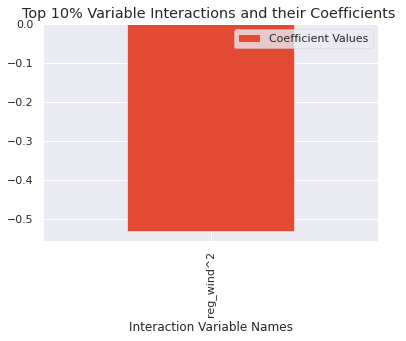

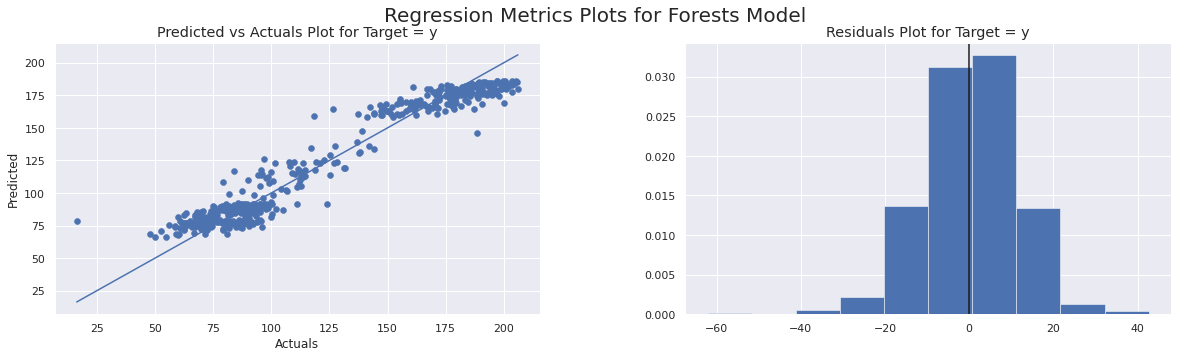

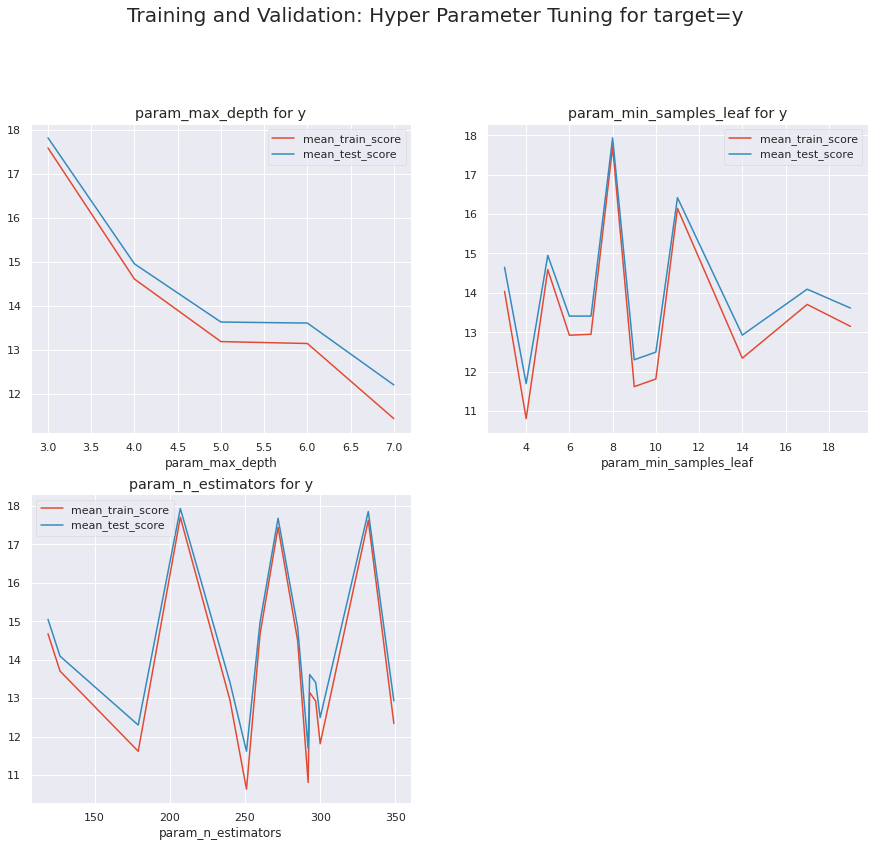

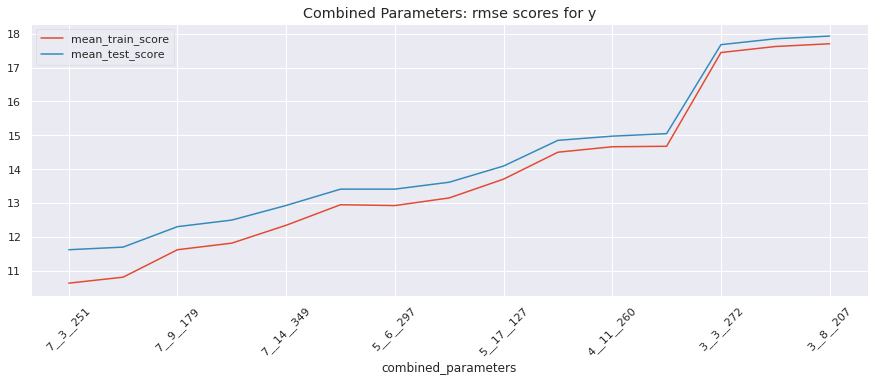

    Time taken for this Target (in seconds) = 175
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Time taken for Stacking: 0.2 seconds
    Adding 1 Stacking feature(s) to training data
    Time taken for Stacking: 0.1 seconds
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Time taken for Stacking: 0.3 seconds
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 176
Writing Output files to disk...
    Saving predictions to ./y/y_Regression_test_modified.csv
    Saving predictions to ./y/y_Regression_submission.csv
    Saving predic

ValueError: ignored

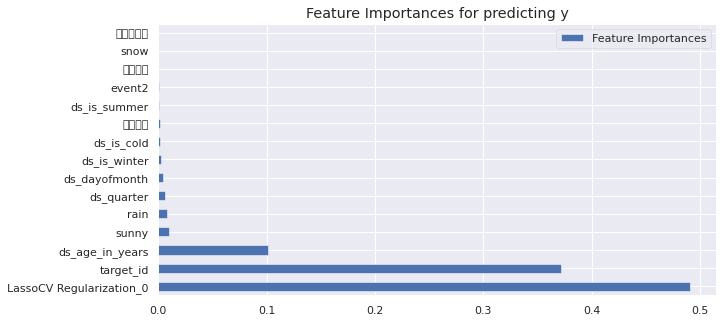

In [ ]:
target = 'y'
m.c,t,f_pred= Auto_ViML(train, target, future_data,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag=False, Binning_Flag=False,
                            Add_Poly=2, Stacking_Flag=True,Imbalanced_Flag=False,
                            verbose=1 )